In [1]:
from random import Random
import math
import numpy as np
import pandas as pd
import logging, sys
from tqdm.autonotebook import tqdm
from matplotlib import interactive
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)


/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
# PART 1: GENERATE RANDOM VARIABLES
def uniRand():
    return Random().uniform(0,1)
def geoRand(p):
    r = uniRand()
    logging.debug('uniform:{}'.format(r))
    i = 1
    y = 0
    while(True):
        y += math.pow(1-p, i-1)*p
        logging.debug('p(x={})={}'.format(i, y))
        if(r < y):
            return i
        logging.debug('='*20)
        i += 1

DEBUG:matplotlib:CACHEDIR=/Users/taichikato/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/taichikato/.matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


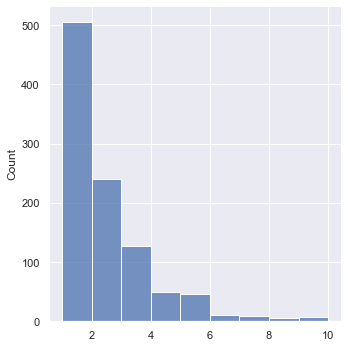

In [5]:
def plotGeoRand():
    logging.disable(logging.CRITICAL)
    arr = []
    p =0.5
    for i in range(1000):
        arr.append(geoRand(p))
    # Apply the default theme
    sns.set_theme()
    sns.displot(arr, binwidth=1)
plotGeoRand()

In [7]:
## Custom Queue testing code
def testQueue():
    queue = Queue()
    queue.enqueue(Job(1, 1))
    queue.enqueue(Job(2, 1))
    queue.enqueue(Job(3, 1))
    print(queue.length())
    print(queue.dequeue())
    print(queue.dequeue())
    print(queue.dequeue())
    print(queue.dequeue())

In [8]:
# QUEUE IMPLEMENTATION WITH LINKED LISTS
class Node():
    def __init__(self, job):
        self.val = job
        self.next = None
class Queue():
    def __init__(self):
        self.head = None
        self.tail = None
    def length(self):
        size = 0
        node = self.head
        while(node != None):
            node = node.next
            size += 1
        return size
    def enqueue(self, j):
        job = Node(j)
        if self.tail != None:
            self.tail.next = job
            self.tail = job
        else:
            self.head = job
            self.tail = job
    def dequeue(self):
        if self.head != None:
            r = self.head
            self.head = self.head.next
            return r.val
        else:
            return None
            print('trying to dequeue an empty array')
            
# PART 2: SERVER OBJECTS IMPLEMENTATION
class Job(object):
    def process_time(self):
        if self.departure < self.arrival:
            # The departure time is not computed yet
            return None
        return self.departure - self.arrival
    def __str__(self):
        return('Object: Job(size={}, arrival={}, departure={})'.format(self.size, self.arrival, self.departure))
    def __init__(self, size, arrival):
        self.size = size
        self.arrival = arrival
        self.departure = None
        
class Server(object):
    def queue_length(self):
        return len(self.queue) + (1 if self.current != None else 0)
    def log_arr(self):
        if(self.n > self.k):
            self.arr_log.append(self.queue_length()) 
    def log_dep(self, t):
        if(self.n > self.k):
            self.dep_log.append(t)
    def next_departure(self):
        return (self.current.departure if self.current != None else None)
    def arrival(self, job):
        self.log_arr()
        if self.current != None:
            logging.debug('enqueing job')
            self.queue.append(job)
        else:
            self.current = job
            self.current.departure = job.arrival + job.size
        self.next_arrival += geoRand(self.p)
        self.n += 1
    def departure(self):
        prev_dep = self.next_departure()
        process_time = self.current.process_time() 
        if len(self.queue) > 0:
            self.current = self.queue.pop()
            self.current.departure = prev_dep + self.current.size
        else:
            logging.debug("|- Last item")
            self.current = None
        self.log_dep(process_time)
        return prev_dep
    def run(self, MAX_ARRIVAL, k):
        self.n = 0 # Number of arrivals
        self.t = 0 # Server time
        self.dep_log = []
        self.arr_log = []
        self.k = k
        with tqdm(total=MAX_ARRIVAL) as pbar:
            while(MAX_ARRIVAL > self.n):
                logging.debug("t={} n={} next_arr={} next_dep={} size={}".format(self.t, 
                                                                                 self.n, 
                                                                                 self.next_arrival, 
                                                                                 self.next_departure(), 
                                                                                 self.queue_length()))
                if(self.next_departure() == None 
                   or self.next_arrival < self.next_departure() 
                   or self.next_departure() == 0):
                    logging.debug("|– processing arrival")
                    self.t = self.next_arrival
                    job = Job(geoRand(self.q), self.t)
                    s.arrival(job)
                    pbar.update(1)
                else:
                    logging.debug("|– processing departure")
                    self.t = self.departure()
        return (self.arr_log, self.dep_log)
    def __init__(self, p, q):
        self.p = p
        self.q = q
        self.queue = []
        self.current = None
        self.next_arrival = geoRand(self.p)

In [9]:
# Given a list, return the mean value
def list_avg(lst):
    return sum(lst) / len(lst)

# Probability of Geometric job size distribution (fixed), arrival distribution (0 < p < 0.5)
q = 0.5
p = 0.5

# number of arrivals + number of discarded items
n = 10000
k = 2000

# Create a single server instance and run the experiment
data = []
for i in tqdm(range(1,50)):
    p = i/100
    s = Server(p, q) 
    n_jobs, n_res_time = s.run(n, k) # Run the experiment with n = 100000, k = 2000
    # Estimate expected values
    avg_n = list_avg(n_jobs)
    avg_t = list_avg(n_res_time)
    # Generate theoretical values
    e_n = p*(1-p)/(q-p)
    e_t = (1-p)/(q-p)
    data.append([p, avg_n, avg_t, "avg"])
    data.append([p, e_n, e_t, "estimated"])


In [11]:
# Data conversion for visualization
df = pd.DataFrame(data, columns=['p', 'avg_n', 'avg_t', 'type'])
df = df[df["p"] < 0.49]
sns.set_theme(context='notebook', style='white', palette='gist_ncar', font='sans-serif', font_scale=1, color_codes=True)

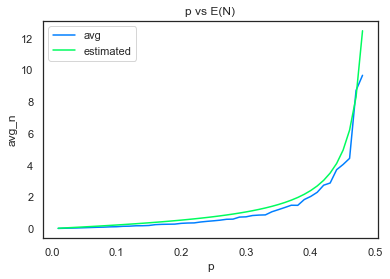

In [12]:
# Plot p vs E(N)
g = sns.lineplot(data=df, x="p", y="avg_n", hue="type", legend=True)
g.set_title("p vs E(N)")
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[2:], labels=labels[2:])

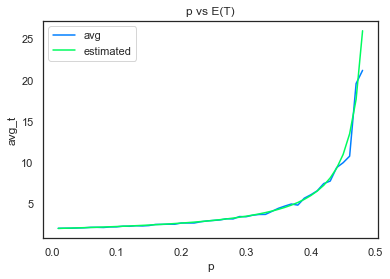

In [20]:
# Plot p vs E(T
g = sns.lineplot(data=df, x="p", y="avg_t", hue="type", legend=True)
g.set_title("p vs E(T)")
handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[2:], labels=labels[2:])

In [21]:
print("E(N)={}, E(T)={}*".format(list_avg(s.dep_log), list_avg(s.arr_log)))
print("*E(N) is mean number of jobs, E(T) is mean response time")

E(N)=48.08678184009642, E(T)=22.890870828740354*
*E(N) is mean number of jobs, E(T) is mean response time


[Text(0.5, 1.0, 'Queue Length')]

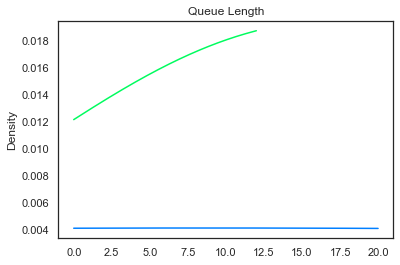

In [22]:
# g = sns.kdeplot(s.dep_log, clip=(0,20), bw_adjust=2, label="Processing Time")
# g.set(title="Processing Time")

# a = sns.kdeplot(s.arr_log, bw_adjust=5, clip=(0,12), label="Queue Length")
# a.set(title="Queue Length")